# Handwritten style transfer using CycleGAN

This notebook demonstrates an interesting application of cycleGAN -- handwritten style transfer. We will use the cycleGAN model to transfer the style of one Chinese characters to another.

In [1]:
# set the environment
%load_ext autoreload
%autoreload 2
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
print(device)
print(dtype)

cuda
<class 'torch.cuda.FloatTensor'>


In [2]:
# load the training data

from torch.utils.data import DataLoader
from torchvision import transforms
from DataReader import MyDataset

transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = 'style'
Dataset_X = MyDataset(path= f'./data/{dataset}/train/songti/', num=1000, transform=transform, type='.png')
Dataset_Y = MyDataset(path= f'./data/{dataset}/train/wxz/', num=1000, transform=transform)

train_X = DataLoader(Dataset_X, batch_size=1, shuffle=True)
train_Y = DataLoader(Dataset_Y, batch_size=1, shuffle=True) 
train_X = [1 - x for x in train_X]
train_Y = [1 - y for y in train_Y]

In [3]:
# set the model
from Gen import Generator
from Dis import Discriminator
from torch.optim import Adam

Gxy = Generator().type(dtype)
Oxy = Adam(Gxy.parameters(), lr=2e-4)

Gyx = Generator().type(dtype)
Oyx = Adam(Gyx.parameters(), lr=2e-4)

Dx = Discriminator().type(dtype)
Ox = Adam(Dx.parameters(), lr=2e-4)

Dy = Discriminator().type(dtype)
Oy = Adam(Dy.parameters(), lr=2e-4)

In [4]:
# loss functions

import torch.nn.functional as F

def loss_D_ls(scores_real, scores_fake):
    return torch.mean((scores_real - 1) ** 2) + torch.mean(scores_fake ** 2)

def loss_D_ce(scores_real, scores_fake):
    return F.binary_cross_entropy_with_logits(scores_real, torch.ones_like(scores_real)) + \
           F.binary_cross_entropy_with_logits(scores_fake, torch.zeros_like(scores_fake))

def loss_G_ls(scores_fake):
    return torch.mean((scores_fake - 1) ** 2)

def loss_G_ce(scores_fake):
    return F.binary_cross_entropy_with_logits(scores_fake, torch.ones_like(scores_fake))

def loss_C(real, fake):
    return torch.mean(torch.abs(fake - real))

epoch: 0 | step: 0 | loss_Dx: 0.0967 | loss_Dy: 0.0027 | loss_Gxy: 8.0003 | loss_Gyx: 1.3673 | loss_cycle: 1.2879


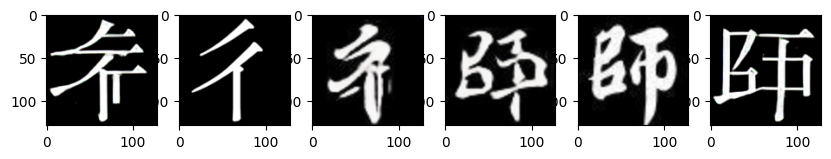

epoch: 0 | step: 300 | loss_Dx: 0.0358 | loss_Dy: 0.0063 | loss_Gxy: 5.6936 | loss_Gyx: 8.3753 | loss_cycle: 1.7674


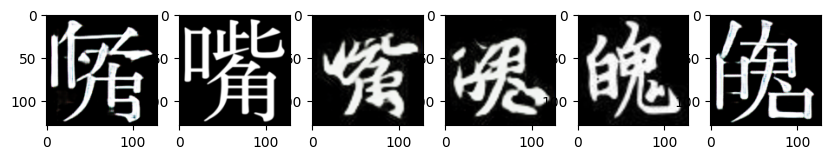

epoch: 0 | step: 600 | loss_Dx: 0.0045 | loss_Dy: 0.0107 | loss_Gxy: 9.6219 | loss_Gyx: 5.7312 | loss_cycle: 1.4956


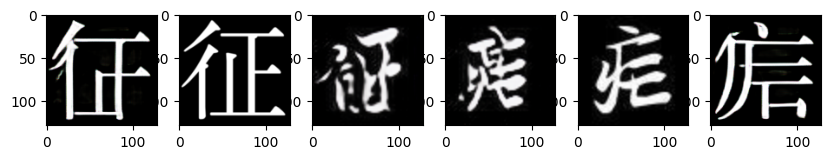

epoch: 0 | step: 900 | loss_Dx: 0.0238 | loss_Dy: 0.0616 | loss_Gxy: 2.2014 | loss_Gyx: 3.7616 | loss_cycle: 1.7739


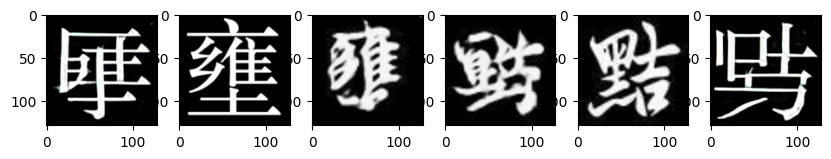

epoch: 1 | step: 0 | loss_Dx: 0.0007 | loss_Dy: 0.0015 | loss_Gxy: 5.3613 | loss_Gyx: 7.3905 | loss_cycle: 1.8613


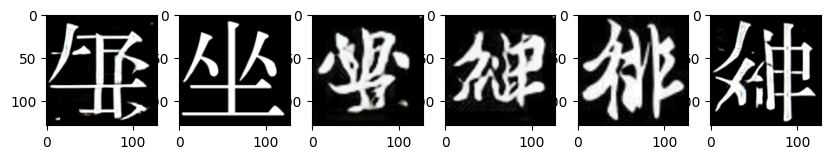

epoch: 1 | step: 300 | loss_Dx: 0.0060 | loss_Dy: 0.0810 | loss_Gxy: 3.5999 | loss_Gyx: 12.0638 | loss_cycle: 1.7167


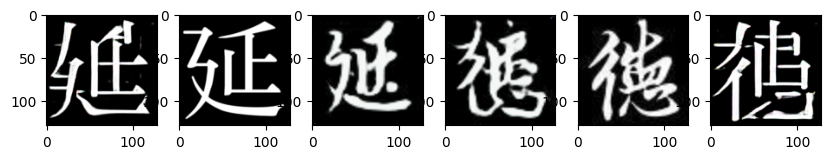

epoch: 1 | step: 600 | loss_Dx: 0.0013 | loss_Dy: 0.0010 | loss_Gxy: 8.2721 | loss_Gyx: 6.9465 | loss_cycle: 2.0565


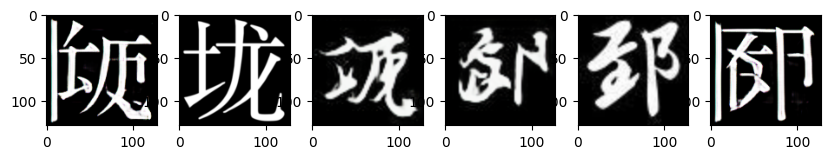

epoch: 1 | step: 900 | loss_Dx: 0.0423 | loss_Dy: 0.0042 | loss_Gxy: 5.4606 | loss_Gyx: 11.7654 | loss_cycle: 1.8964


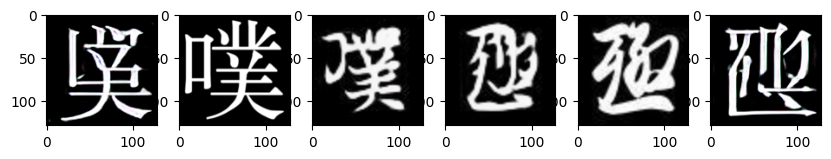

epoch: 2 | step: 0 | loss_Dx: 0.0005 | loss_Dy: 0.0032 | loss_Gxy: 6.8123 | loss_Gyx: 11.1299 | loss_cycle: 1.5432


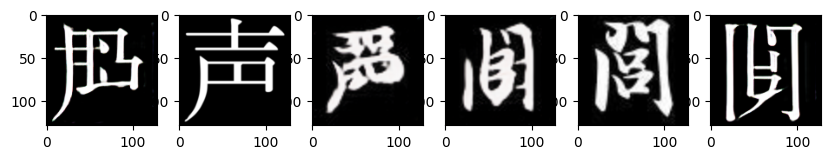

epoch: 2 | step: 300 | loss_Dx: 0.0772 | loss_Dy: 0.0082 | loss_Gxy: 6.9562 | loss_Gyx: 2.8330 | loss_cycle: 1.4906


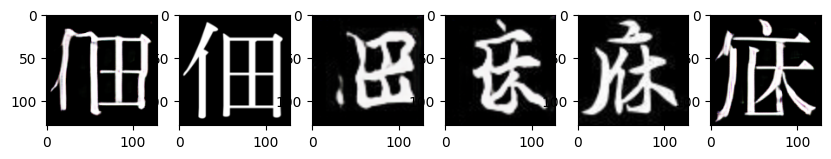

epoch: 2 | step: 600 | loss_Dx: 0.0092 | loss_Dy: 3.6980 | loss_Gxy: 4.0916 | loss_Gyx: 3.8381 | loss_cycle: 1.5314


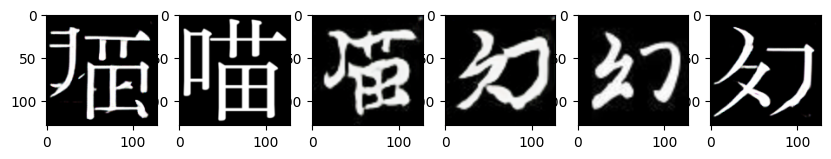

epoch: 2 | step: 900 | loss_Dx: 0.0146 | loss_Dy: 0.0800 | loss_Gxy: 1.9561 | loss_Gyx: 4.4277 | loss_cycle: 2.0799


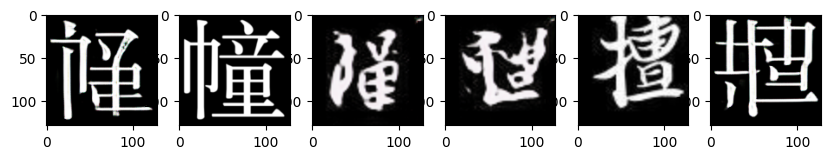

epoch: 3 | step: 0 | loss_Dx: 0.0126 | loss_Dy: 0.0010 | loss_Gxy: 9.8634 | loss_Gyx: 5.3778 | loss_cycle: 1.8571


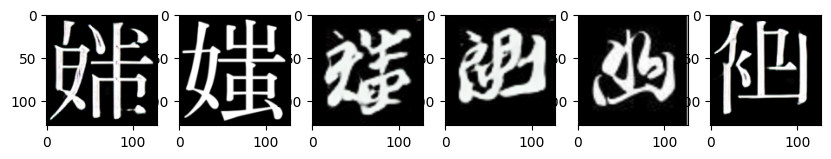

epoch: 3 | step: 300 | loss_Dx: 0.0008 | loss_Dy: 0.3022 | loss_Gxy: 3.8936 | loss_Gyx: 7.9191 | loss_cycle: 1.7114


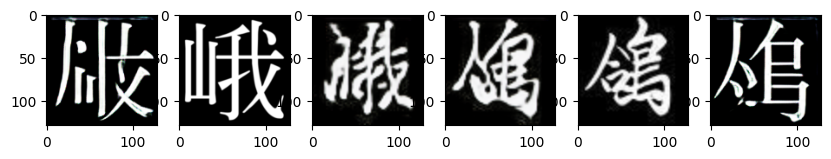

epoch: 3 | step: 600 | loss_Dx: 0.0005 | loss_Dy: 0.2880 | loss_Gxy: 5.3402 | loss_Gyx: 10.5407 | loss_cycle: 1.3418


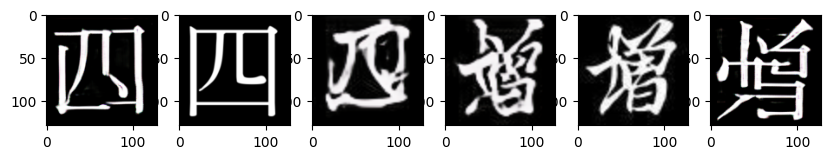

epoch: 3 | step: 900 | loss_Dx: 0.1085 | loss_Dy: 0.1661 | loss_Gxy: 2.2484 | loss_Gyx: 8.9609 | loss_cycle: 1.6471


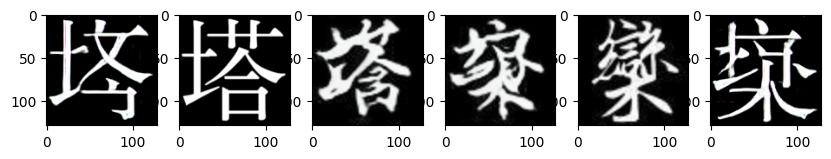

epoch: 4 | step: 0 | loss_Dx: 0.0946 | loss_Dy: 0.2139 | loss_Gxy: 3.2401 | loss_Gyx: 7.7384 | loss_cycle: 1.0498


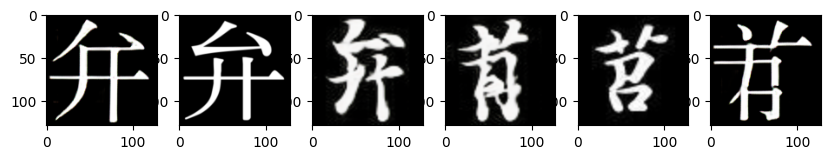

epoch: 4 | step: 300 | loss_Dx: 0.0269 | loss_Dy: 0.1461 | loss_Gxy: 1.8756 | loss_Gyx: 4.6308 | loss_cycle: 1.6094


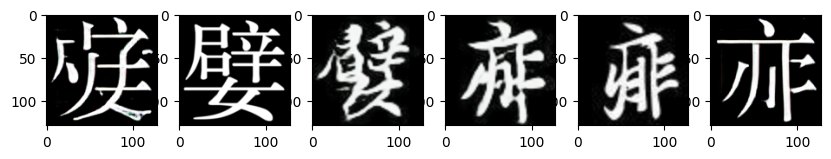

epoch: 4 | step: 600 | loss_Dx: 0.1275 | loss_Dy: 0.0548 | loss_Gxy: 5.9603 | loss_Gyx: 3.1639 | loss_cycle: 1.0429


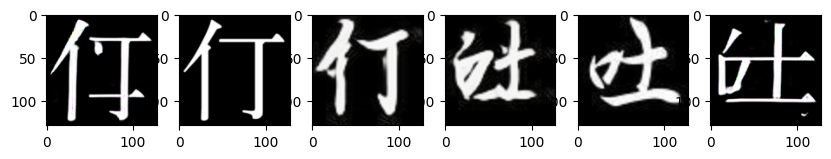

epoch: 4 | step: 900 | loss_Dx: 0.0178 | loss_Dy: 3.7172 | loss_Gxy: 0.1405 | loss_Gyx: 3.9715 | loss_cycle: 1.2421


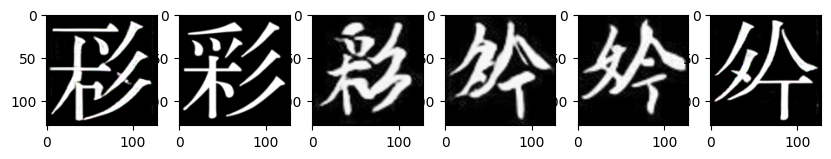

epoch: 5 | step: 0 | loss_Dx: 0.0052 | loss_Dy: 0.1845 | loss_Gxy: 2.0890 | loss_Gyx: 5.1921 | loss_cycle: 1.1208


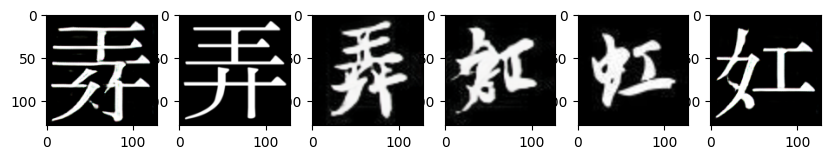

epoch: 5 | step: 300 | loss_Dx: 0.0086 | loss_Dy: 0.0460 | loss_Gxy: 4.1696 | loss_Gyx: 4.4323 | loss_cycle: 1.3025


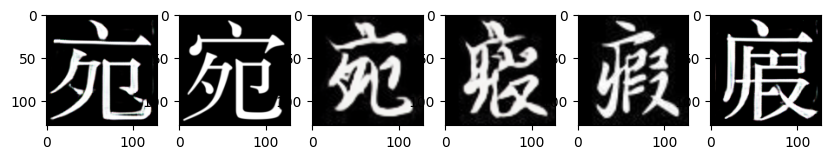

epoch: 5 | step: 600 | loss_Dx: 0.0030 | loss_Dy: 0.1216 | loss_Gxy: 2.0876 | loss_Gyx: 6.4593 | loss_cycle: 1.5169


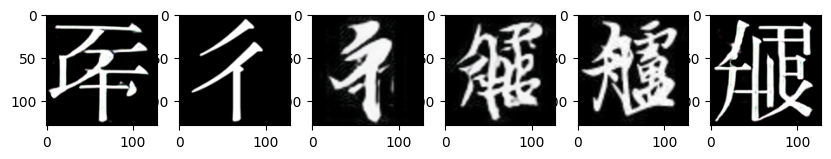

epoch: 5 | step: 900 | loss_Dx: 0.0099 | loss_Dy: 0.6711 | loss_Gxy: 1.0796 | loss_Gyx: 5.2985 | loss_cycle: 1.6465


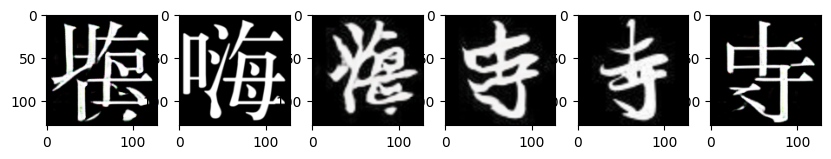

epoch: 6 | step: 0 | loss_Dx: 0.0049 | loss_Dy: 0.0177 | loss_Gxy: 5.6225 | loss_Gyx: 5.9430 | loss_cycle: 1.3365


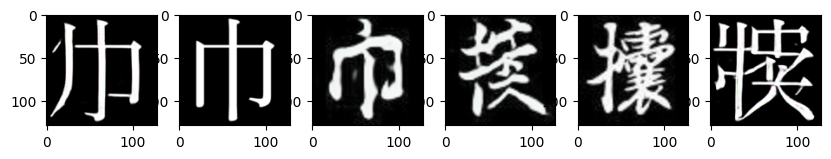

epoch: 6 | step: 300 | loss_Dx: 0.0024 | loss_Dy: 0.0531 | loss_Gxy: 4.7463 | loss_Gyx: 5.0426 | loss_cycle: 1.3746


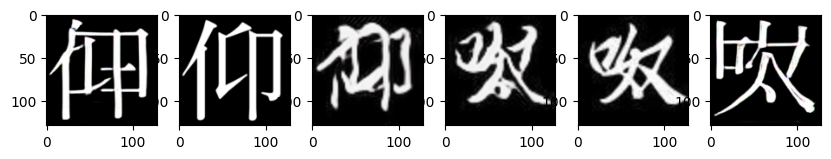

epoch: 6 | step: 600 | loss_Dx: 0.4294 | loss_Dy: 0.0846 | loss_Gxy: 3.5255 | loss_Gyx: 8.0907 | loss_cycle: 1.6757


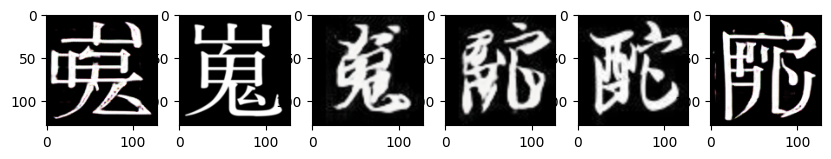

epoch: 6 | step: 900 | loss_Dx: 0.0038 | loss_Dy: 0.3110 | loss_Gxy: 1.5188 | loss_Gyx: 5.2588 | loss_cycle: 1.5721


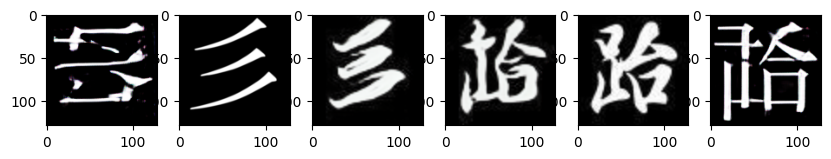

epoch: 7 | step: 0 | loss_Dx: 0.0112 | loss_Dy: 0.4095 | loss_Gxy: 2.0111 | loss_Gyx: 4.9036 | loss_cycle: 1.7788


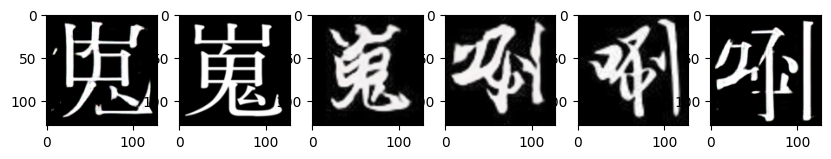

epoch: 7 | step: 300 | loss_Dx: 0.0008 | loss_Dy: 0.7027 | loss_Gxy: 1.2405 | loss_Gyx: 9.0468 | loss_cycle: 1.4828


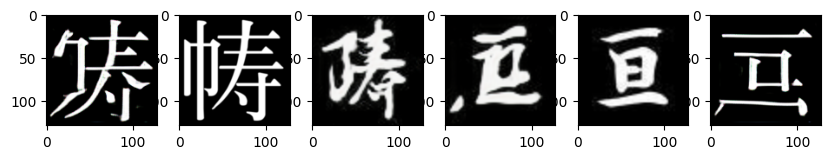

epoch: 7 | step: 600 | loss_Dx: 0.0104 | loss_Dy: 0.1450 | loss_Gxy: 1.7023 | loss_Gyx: 6.6229 | loss_cycle: 1.5523


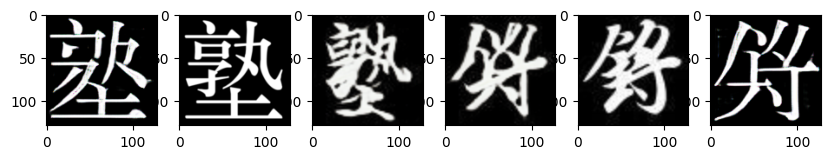

epoch: 7 | step: 900 | loss_Dx: 0.0009 | loss_Dy: 0.2890 | loss_Gxy: 1.8228 | loss_Gyx: 6.0774 | loss_cycle: 1.4292


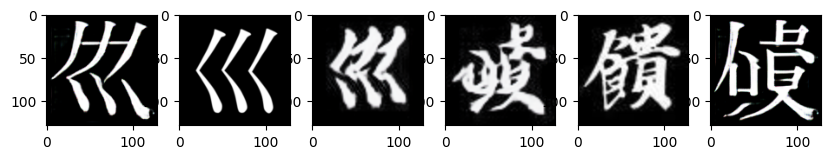

epoch: 8 | step: 0 | loss_Dx: 0.0030 | loss_Dy: 0.0643 | loss_Gxy: 3.1274 | loss_Gyx: 8.3302 | loss_cycle: 1.6151


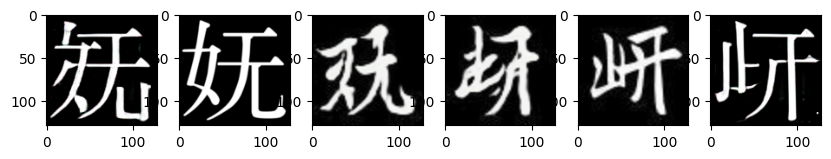

epoch: 8 | step: 300 | loss_Dx: 0.0034 | loss_Dy: 0.4606 | loss_Gxy: 3.4698 | loss_Gyx: 7.6818 | loss_cycle: 1.5167


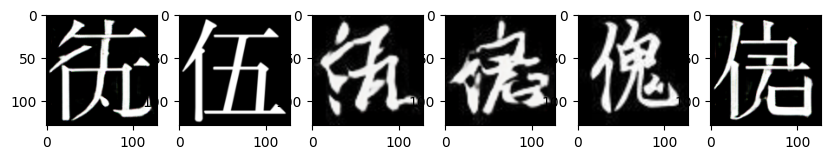

epoch: 8 | step: 600 | loss_Dx: 0.0007 | loss_Dy: 0.3959 | loss_Gxy: 7.4096 | loss_Gyx: 7.1361 | loss_cycle: 2.0227


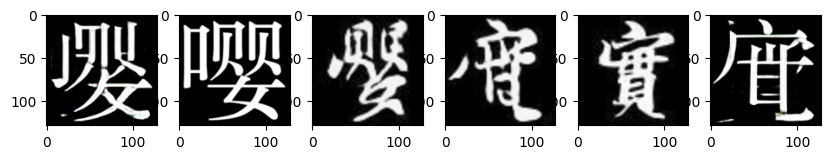

epoch: 8 | step: 900 | loss_Dx: 0.0037 | loss_Dy: 0.2583 | loss_Gxy: 1.5412 | loss_Gyx: 6.0435 | loss_cycle: 1.4547


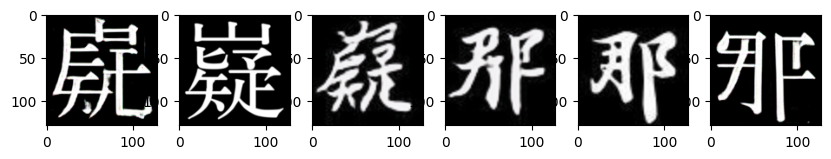

epoch: 9 | step: 0 | loss_Dx: 2.4692 | loss_Dy: 0.6063 | loss_Gxy: 2.0689 | loss_Gyx: 0.5665 | loss_cycle: 1.0328


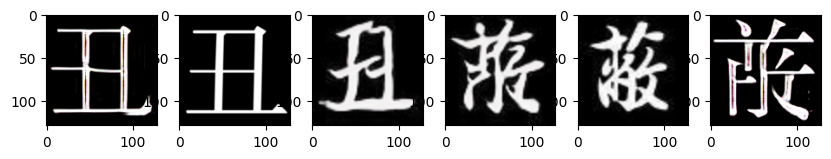

epoch: 9 | step: 300 | loss_Dx: 0.0591 | loss_Dy: 0.8238 | loss_Gxy: 5.5273 | loss_Gyx: 10.1509 | loss_cycle: 1.6528


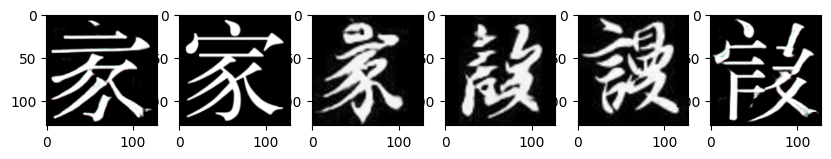

epoch: 9 | step: 600 | loss_Dx: 0.0028 | loss_Dy: 0.0136 | loss_Gxy: 5.5188 | loss_Gyx: 8.7082 | loss_cycle: 1.1621


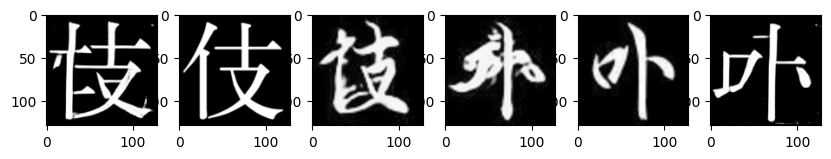

epoch: 9 | step: 900 | loss_Dx: 0.2710 | loss_Dy: 0.2997 | loss_Gxy: 2.1531 | loss_Gyx: 6.8787 | loss_cycle: 1.5471


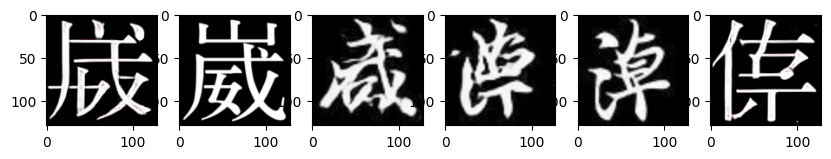

In [7]:
# training
import random
import matplotlib.pyplot as plt

alpha = 10
for epoch in range(10):
    random.shuffle(train_X)
    random.shuffle(train_Y)
    for t, (x, y) in enumerate(zip(train_X, train_Y)):
        real_x = x.type(dtype)
        real_y = y.type(dtype)
        for i in range(1):
            fake_x = Gyx(real_y)
            fake_y = Gxy(real_x)

            # train Dx
            Ox.zero_grad()
            scores_real = Dx(real_x)
            scores_fake = Dx(fake_x)
            loss_Dx = loss_D_ce(scores_real, scores_fake)
            loss_Dx.backward()
            Ox.step()

            # train Dy
            Oy.zero_grad()
            scores_real = Dy(real_y)
            scores_fake = Dy(fake_y)
            loss_Dy = loss_D_ce(scores_real, scores_fake)
            loss_Dy.backward()
            Oy.step()

        for i in range(1):
            fake_x = Gyx(real_y)
            fake_y = Gxy(real_x)
            back_x = Gyx(fake_y)
            back_y = Gxy(fake_x)

            Oxy.zero_grad()
            Oyx.zero_grad()
            loss_cycle = alpha * 0.5 * (loss_C(real_x, back_x) + loss_C(real_y, back_y))
            loss_cycle.backward(retain_graph=True)

            # train Gxy
            scores_fake = Dy(fake_y)
            loss_Gxy = loss_G_ce(scores_fake)
            loss_Gxy.backward()
            Oxy.step()

            # train Gyx
            scores_fake = Dx(fake_x)
            loss_Gyx = loss_G_ce(scores_fake)
            loss_Gyx.backward()
            Oyx.step()

        if t % 300 == 0:
            print('epoch: %d | step: %d | loss_Dx: %.4f | loss_Dy: %.4f | loss_Gxy: %.4f | loss_Gyx: %.4f | loss_cycle: %.4f' % (epoch, t, loss_Dx.item(), loss_Dy.item(), loss_Gxy.item(), loss_Gyx.item(), loss_cycle.item()))
            plt.figure(figsize=(10, 60))
            plt.subplot(1, 6, 1)
            plt.imshow(back_x[0].detach().cpu().permute(1, 2, 0))
            plt.subplot(1, 6, 2)
            plt.imshow(real_x[0].detach().cpu().permute(1, 2, 0))
            plt.subplot(1, 6, 3)
            plt.imshow(fake_y[0].detach().cpu().permute(1, 2, 0))
            plt.subplot(1, 6, 4)
            plt.imshow(back_y[0].detach().cpu().permute(1, 2, 0))
            plt.subplot(1, 6, 5)
            plt.imshow(real_y[0].detach().cpu().permute(1, 2, 0))
            plt.subplot(1, 6, 6)
            plt.imshow(fake_x[0].detach().cpu().permute(1, 2, 0))
            plt.show()

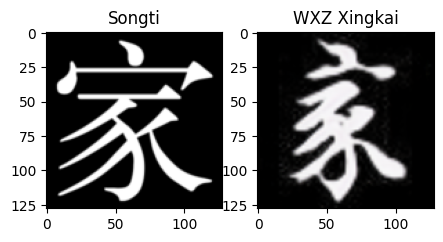

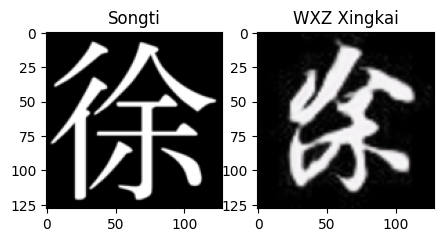

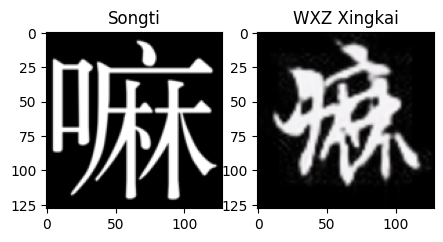

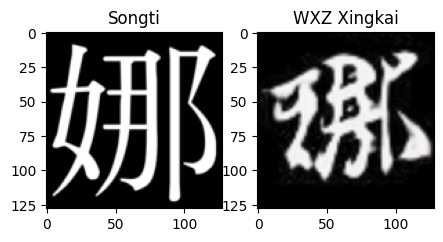

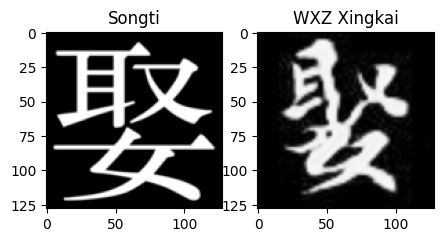

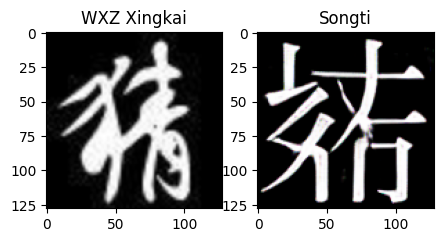

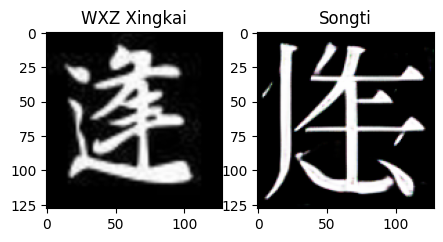

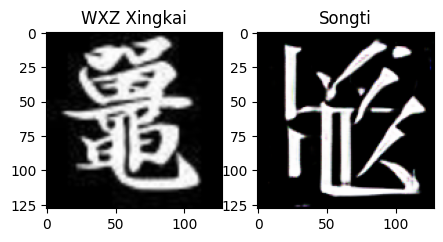

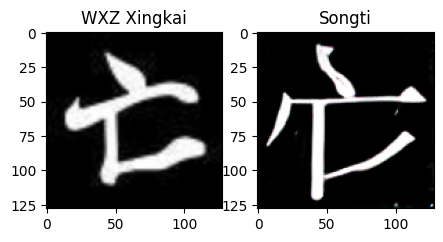

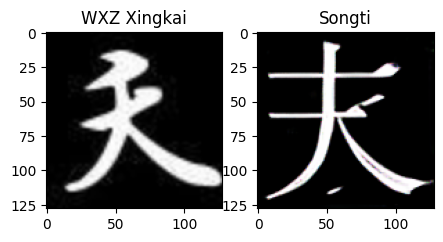

In [35]:
# test results

for i in random.sample(train_X, 5):
    plt.figure(figsize=(5, 10))
    plt.subplot(1, 2, 1)
    plt.title('Songti')
    plt.imshow(i[0].permute(1, 2, 0))
    
    plt.subplot(1, 2, 2)
    plt.title('WXZ Xingkai')
    plt.imshow(Gxy(i.type(dtype))[0].detach().cpu().permute(1, 2, 0))

for i in random.sample(train_Y, 5):
    plt.figure(figsize=(5, 10))
    plt.subplot(1, 2, 1)
    plt.title('WXZ Xingkai')
    plt.imshow(i[0].permute(1, 2, 0))
    
    plt.subplot(1, 2, 2)
    plt.title('Songti')
    plt.imshow(Gyx(i.type(dtype))[0].detach().cpu().permute(1, 2, 0))

In [23]:
# save the model
torch.save(Dx.state_dict(),'model_han/Dx.pth')
torch.save(Dy.state_dict(),'model_han/Dy.pyh')
torch.save(Gxy.state_dict(),'model_han/Gxy.pyh')
torch.save(Gyx.state_dict(),'model_han/Gyx.pyh')
